## Introduction to Apache Spark

This chapter provides a gentle introduction to Spark, walking through its core architecture, Spark Applications, and structured APIs using DataFrames and SQL.

**Spark's Basic Architecture:**

Spark overcomes the limitations of single machines for large-scale data processing by coordinating tasks across a cluster of computers.  This cluster is managed by a cluster manager (e.g., Spark Standalone, YARN, Mesos), which allocates resources to Spark Applications.

**Spark Applications:**

A Spark Application consists of:

* **Driver Process:** Runs the `main()` function, resides on a cluster node, and is responsible for:
    * Maintaining information about the Spark Application.
    * Responding to user input.
    * Analyzing, distributing, and scheduling work across executors.  Crucially, the Driver program *assigns tasks to executors*.
* **Executor Processes:** Carry out the work assigned by the driver. Their responsibilities include:
    * Executing assigned code.
    * Reporting the computation state back to the driver.

Multiple Spark Applications can run concurrently on a cluster.  Spark also has a local mode where the driver and executors run on a single machine.

**Spark's Language APIs:**

Spark provides language APIs for various programming languages, offering consistent core concepts across languages:

* **Scala:** Spark's primary language.
* **Java:**  Full support for Java development.
* **Python:**  Supports most Scala constructs.
* **SQL:** Supports a subset of ANSI SQL 2003.
* **R:** Two libraries, SparkR (in Spark core) and sparklyr (community-driven).

Each language API interacts with Spark through a `SparkSession` object.

**Spark's APIs:**

Spark offers two sets of APIs:

* **Low-level Unstructured APIs:** (RDDs -  Resilient Distributed Datasets)
* **High-level Structured APIs:** (DataFrames, Datasets, and SQL)  These are now preferred for most tasks due to increased performance and usability.


**Starting Spark:**

Spark can be started in interactive mode (`spark-shell` for Scala, `pyspark` for Python) or as a standalone application using `spark-submit`.  An interactive session automatically creates a `SparkSession`. In standalone applications, you must create it explicitly.

**The SparkSession:**

The `SparkSession` is the entry point for interacting with Spark functionality.  It represents a connection to the Spark Application and is used to create DataFrames, Datasets, and execute computations.  There's a one-to-one correspondence between a `SparkSession` and a Spark Application.

**Creating a DataFrame:**

A simple example of creating a DataFrame with a range of numbers:

```scala
// Scala
val myRange = spark.range(1000).toDF("number")

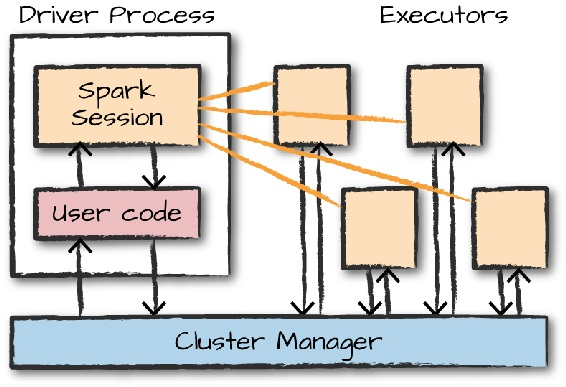

## Explanation of the Spark Architecture Diagram

The diagram depicts a simplified architecture of a Spark application within a cluster environment.

**Components:**

1. **Driver Process:** The control center of the Spark application.
    * **User Code:**  Your Spark application logic (transformations, actions, etc.).
    * **Spark Session:** The interface for interacting with the Spark cluster and managing the application's execution.

2. **Executors:** Workhorses that execute tasks assigned by the driver.  They run on worker nodes in the cluster.  The orange lines represent communication pathways for task assignment and result retrieval between the Spark Session and the Executors.

3. **Cluster Manager:** Manages cluster resources (CPU, memory) and allocates them to Spark applications in the form of executors.  It does *not* directly assign tasks to executors; that's the Driver Program's job.

**Interaction Flow:**

1. **Application Submission:** User submits the Spark application to the cluster.

2. **Resource Allocation:** The Cluster Manager allocates resources (executors) to the application.

3. **Execution Coordination:** The Driver process, via the Spark Session, divides the user code into tasks and distributes them to executors.

4. **Task Execution:** Executors execute assigned tasks using data partitions.

5. **Result Return:** Executors return results to the Driver process.

6. **Result Aggregation:** Driver process collects and aggregates results.

7. **User Retrieval:** Final results are returned to the user or stored as directed.

**Key Points:**

* **Driver Program (User code + Spark Session):** Controls and schedules tasks.
* **Executors:** Perform data processing.
* **Cluster Manager:** Manages resources (executors) but *doesn't* assign individual tasks.
* **Spark Session:** The bridge between user code and the Spark cluster.

This distributed architecture allows Spark to efficiently process large datasets by leveraging parallel processing across multiple machines.